In [ ]:
%pip install matplotlib seaborn pandas scipy scikit-learn


--- bl0q Platform Simulation Summary ---
Revenue (Platform Fee): $12,103.68
COGS (Stripe Fees): $9,553.86
Gross Profit: $2,549.82
EBITDA: $2,549.82
Net Profit: $2,549.82
Gross Margin (%): 21.07%
EBITDA Margin (%): 21.07%
Net Margin (%): 21.07%

--- Infrastructure Cost Breakdown by Project Type ---
              Total Cost ($)  Avg Cost ($)  Project Count
Project Type                                             
code                    7.50          0.25             30
docs                    0.44          0.02             22
image                   0.66          0.03             22
video                  20.91          0.80             26

--- Email Cost Statistics ---
Total Email Cost: $1.01
Average Email Cost per Project: $0.0101

--- Video Project Storage Statistics ---
Average Storage: 5.96 GB
Max Storage: 9.71 GB
Projects with Free Storage: 3
Projects with Charged Storage: 23
✅ Data exported to bl0q_project_simulation.csv


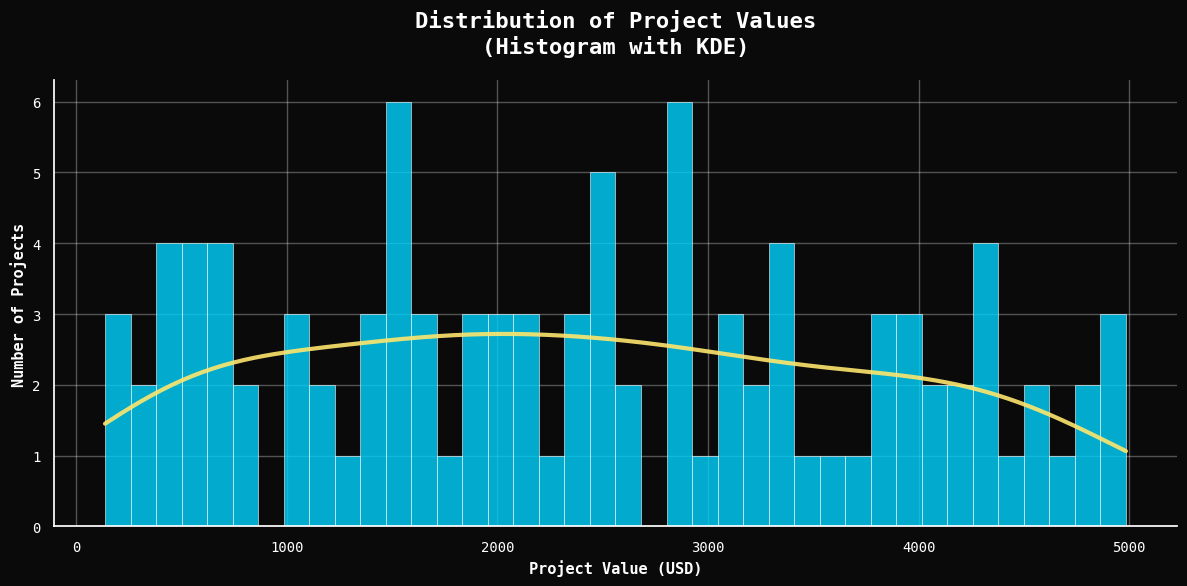

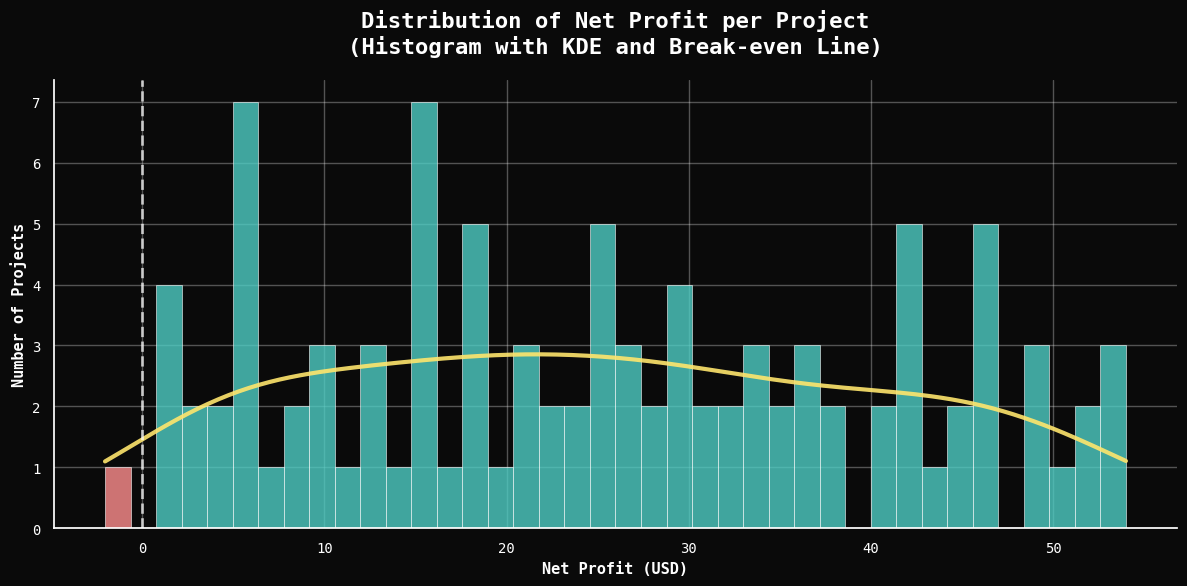

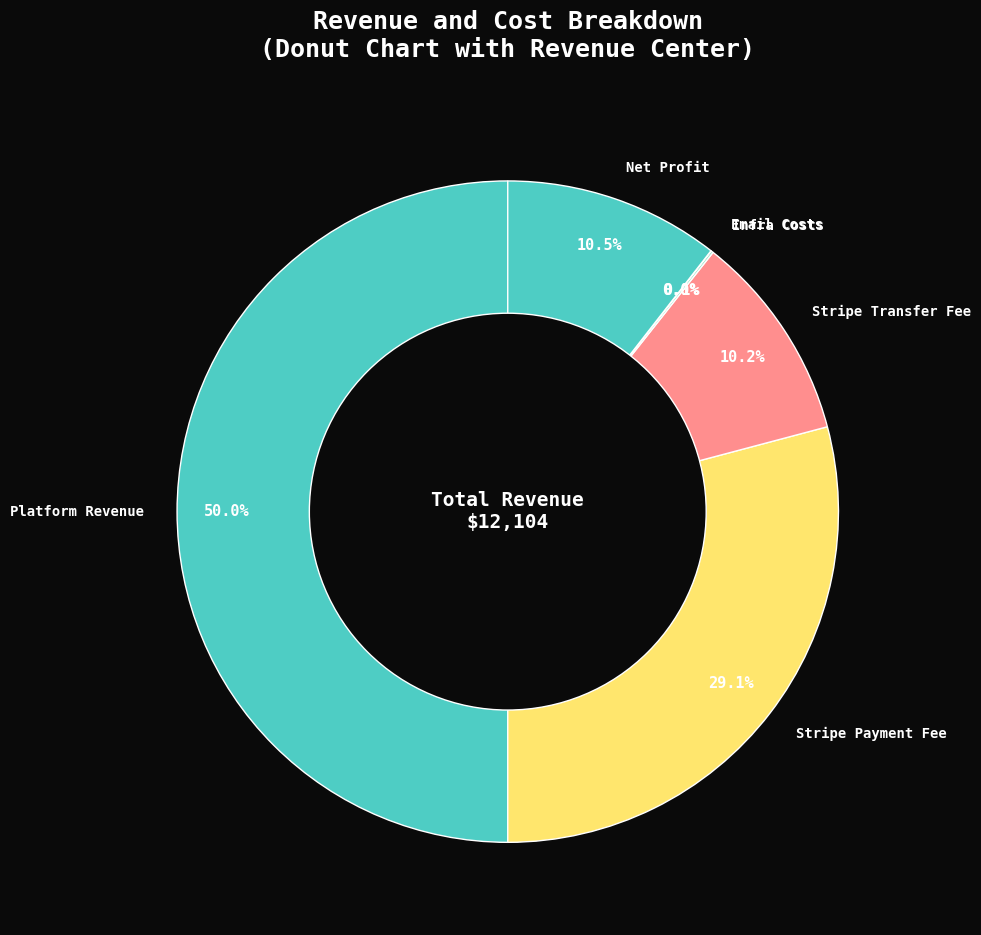

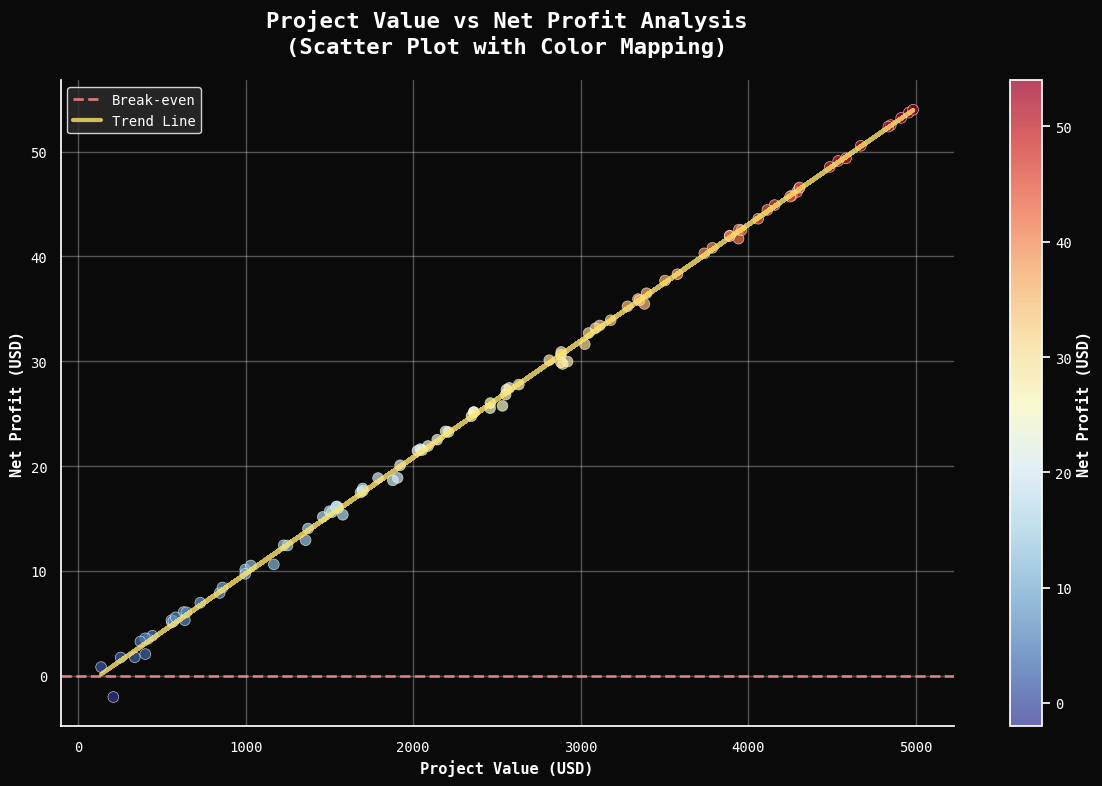

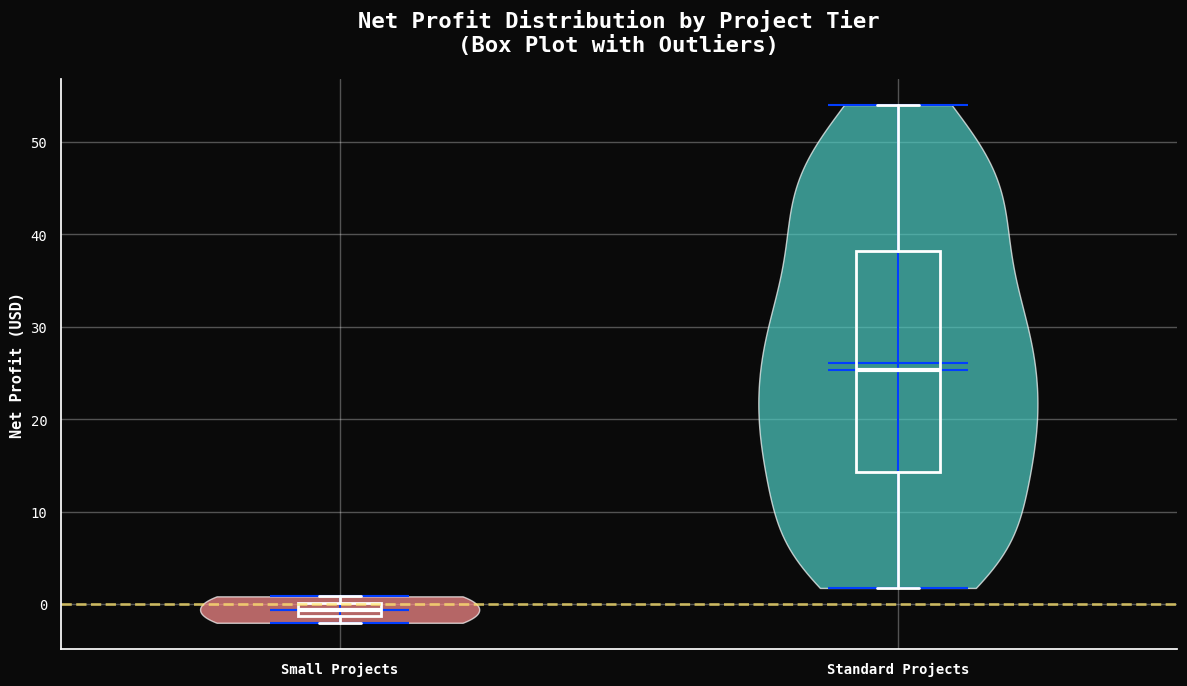

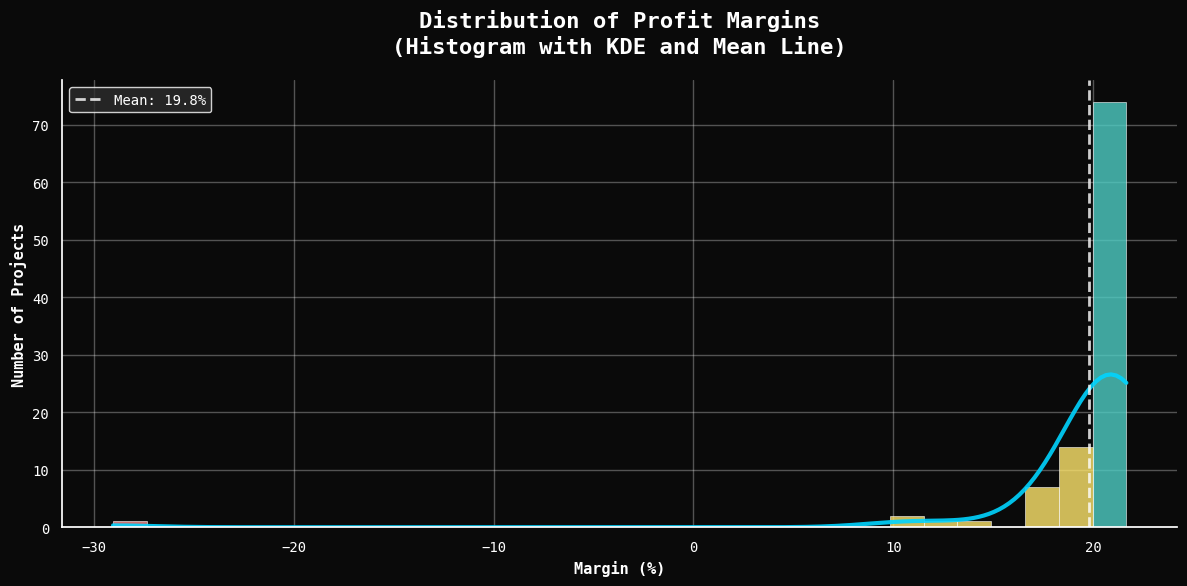

🎨 Modern dark UI visualization complete!
🌟 Features: Gradient colors, dark theme, modern typography, and enhanced visual appeal


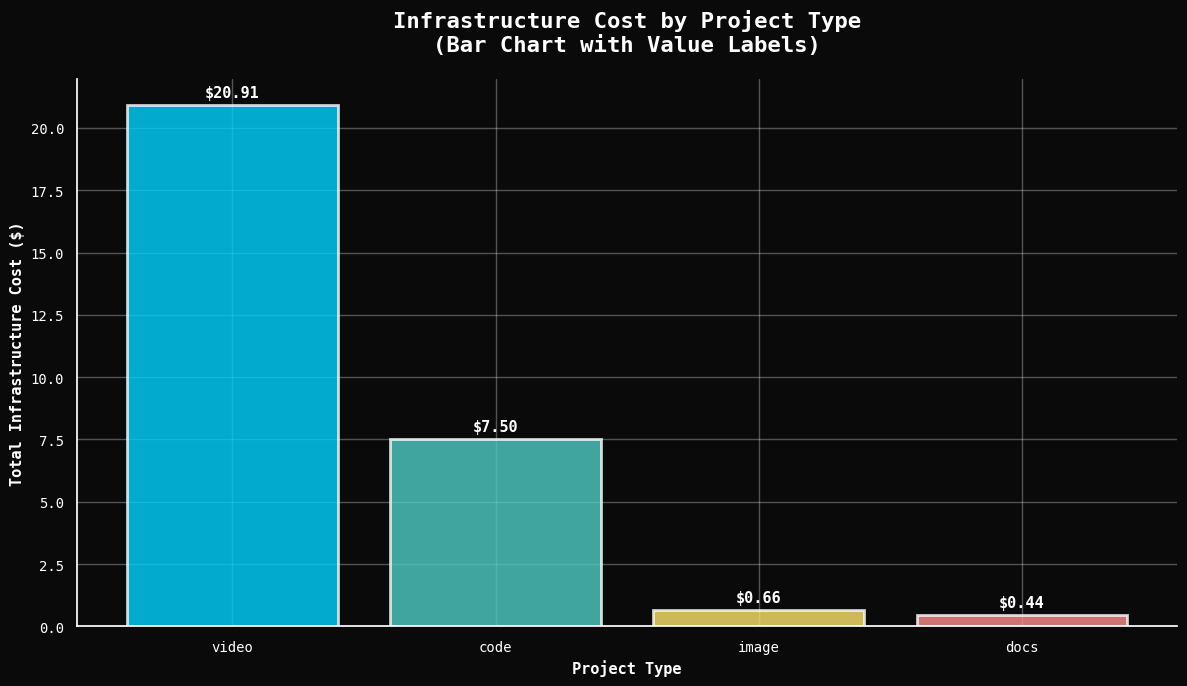

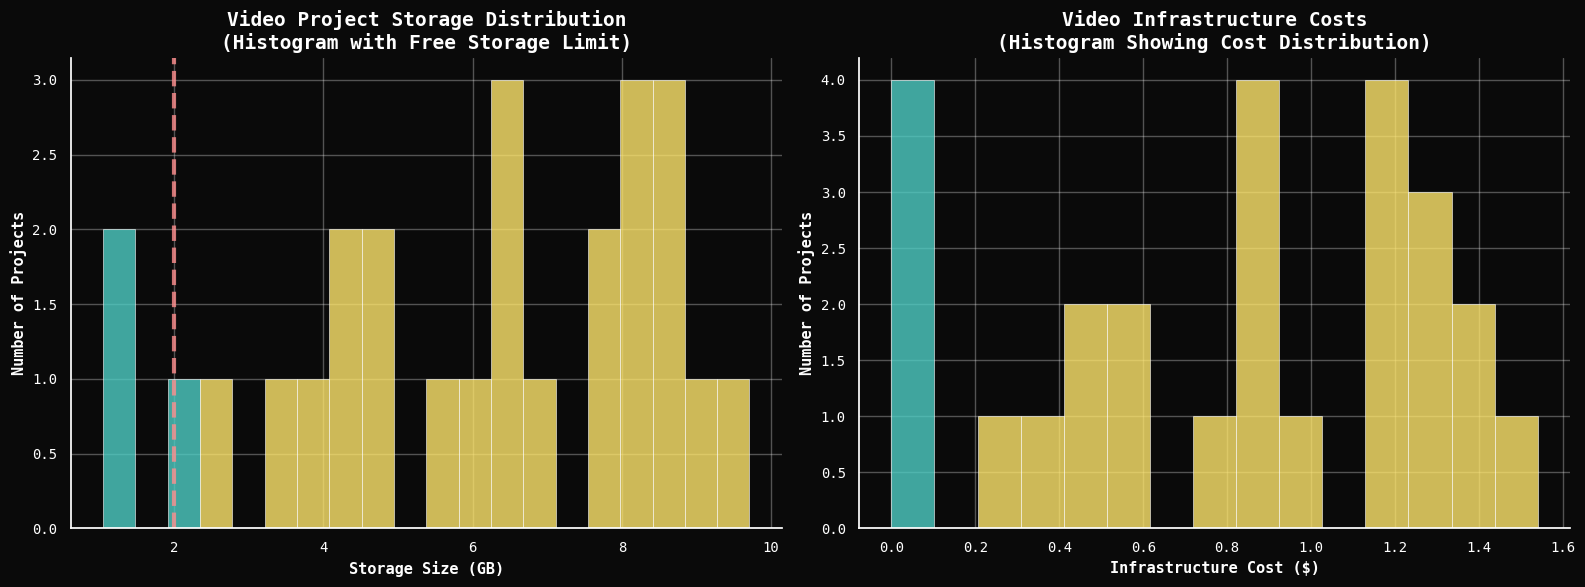

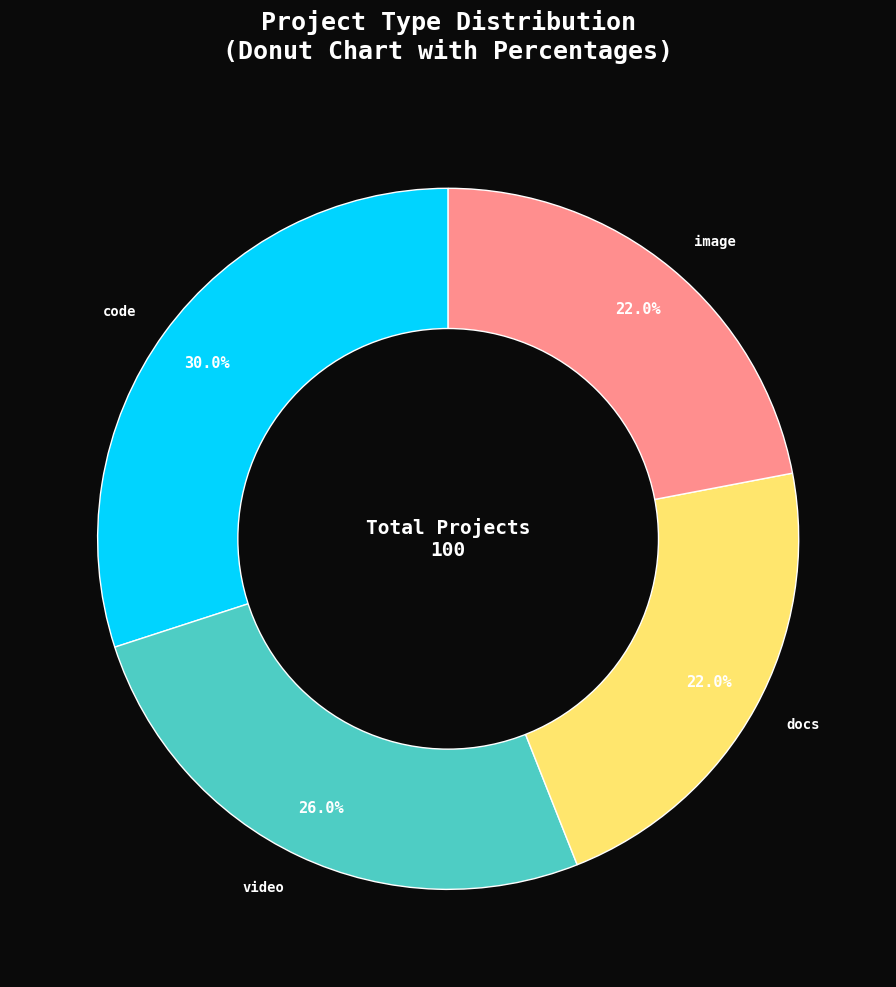

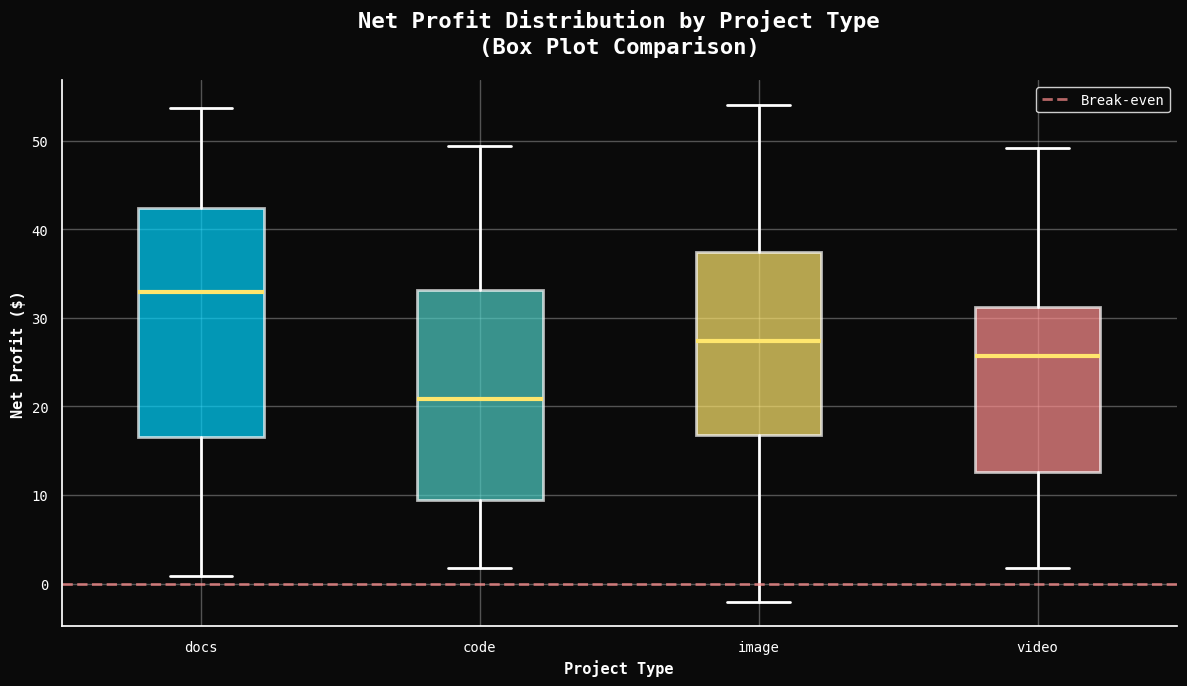

In [5]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
import datetime
import os

# -------------------- Constants --------------------
NUM_PROJECTS = 100
STRIPE_PERCENT = 0.029  # 2.9% payment processing fee
STRIPE_FIXED = 0.30  # fixed Stripe payment processing fee
STRIPE_TRANSFER_PERCENT = 0.01  # 1% payout fee
STRIPE_TRANSFER_FIXED = 0.50  # $0.50 flat fee for payouts

# Project type distribution and infra costs
PROJECT_TYPES = ["code", "docs", "image", "video"]
PROJECT_TYPE_WEIGHTS = [
    0.25,
    0.25,
    0.20,
    0.30,
]  # 25% code, 25% docs, 20% image, 30% video

INFRA_COSTS = {
    "code": 0.25,
    "docs": 0.02,
    "image": 0.03,
    "video": {
        "free_gb": 2,
        "cost_per_gb": 0.20,
    },  # First 2GB free, $0.20 per additional GB
}

# Email cost constants
EMAIL_COST_PER = 0.001
EMAILS_MIN = 5
EMAILS_MAX = 15

# -------------------- Simulation --------------------
project_data = []

for _ in range(NUM_PROJECTS):
    project_value = round(random.uniform(75, 5000), 2)
    platform_fee = (
        7 if project_value < 250 else round(project_value * 0.05, 2)
    )  # Keep original threshold
    stripe_fee = round(project_value * STRIPE_PERCENT + STRIPE_FIXED, 2)
    stripe_transfer_fee = round(
        project_value * STRIPE_TRANSFER_PERCENT + STRIPE_TRANSFER_FIXED, 2
    )

    # Randomly assign project type
    project_type = np.random.choice(PROJECT_TYPES, p=PROJECT_TYPE_WEIGHTS)

    # Calculate infrastructure cost based on project type
    if project_type == "video":
        # Random storage usage between 1GB to 10GB
        storage_gb = round(random.uniform(1, 10), 2)
        # First 2GB free, charge $0.20 per additional GB
        if storage_gb <= INFRA_COSTS["video"]["free_gb"]:
            infra_cost = 0
        else:
            additional_gb = storage_gb - INFRA_COSTS["video"]["free_gb"]
            infra_cost = round(additional_gb * INFRA_COSTS["video"]["cost_per_gb"], 2)
    else:
        storage_gb = 0  # Not applicable for non-video projects
        infra_cost = INFRA_COSTS[project_type]

    # Email cost simulation (total emails per project)
    emails_total = random.randint(EMAILS_MIN, EMAILS_MAX)
    email_cost = emails_total * EMAIL_COST_PER

    net_profit = platform_fee - stripe_fee - stripe_transfer_fee - infra_cost - email_cost
    freelancer_payout = project_value

    project_data.append(
        {
            "Project Value": project_value,
            "Project Type": project_type,
            "Storage GB": storage_gb,
            "Platform Fee": platform_fee,
            "Stripe Fee": stripe_fee,
            "Stripe Transfer Fee": stripe_transfer_fee,
            "Infra Cost": infra_cost,
            "Email Cost": email_cost,
            "Net Profit": net_profit,
            "Freelancer Payout": freelancer_payout,
        }
    )

# -------------------- DataFrame --------------------
df = pd.DataFrame(project_data)
df["Project Tier"] = df["Project Value"].apply(
    lambda x: "Small" if x < 250 else "Standard"  # Keep original business logic
)
df["Margin (%)"] = df["Net Profit"] / df["Platform Fee"] * 100

# -------------------- P&L Table --------------------
pnl = {
    "Revenue (Platform Fee)": df["Platform Fee"].sum(),
    "COGS (Stripe Fees)": df["Stripe Fee"].sum()
    + df["Stripe Transfer Fee"].sum()
    + df["Infra Cost"].sum()
    + df["Email Cost"].sum(),
    "Gross Profit": df["Net Profit"].sum(),
    "EBITDA": df["Net Profit"].sum(),  # assuming zero OPEX for early-stage
    "Net Profit": df["Net Profit"].sum(),
}
pnl["Gross Margin (%)"] = pnl["Gross Profit"] / pnl["Revenue (Platform Fee)"] * 100
pnl["EBITDA Margin (%)"] = pnl["EBITDA"] / pnl["Revenue (Platform Fee)"] * 100
pnl["Net Margin (%)"] = pnl["Net Profit"] / pnl["Revenue (Platform Fee)"] * 100

print("\n--- bl0q Platform Simulation Summary ---")
for k, v in pnl.items():
    if "%" in k:
        print(f"{k}: {v:.2f}%")
    else:
        print(f"{k}: ${v:,.2f}")

# -------------------- Infra Cost Breakdown by Type --------------------
print("\n--- Infrastructure Cost Breakdown by Project Type ---")
infra_by_type = df.groupby("Project Type")["Infra Cost"].agg(["sum", "mean", "count"])
infra_by_type.columns = ["Total Cost ($)", "Avg Cost ($)", "Project Count"]
print(infra_by_type.round(2))

# Email cost breakdown
print("\n--- Email Cost Statistics ---")
print(f"Total Email Cost: ${df['Email Cost'].sum():.2f}")
print(f"Average Email Cost per Project: ${df['Email Cost'].mean():.4f}")

# Video project statistics
video_projects = df[df["Project Type"] == "video"]
if len(video_projects) > 0:
    print("\n--- Video Project Storage Statistics ---")
    print(f"Average Storage: {video_projects['Storage GB'].mean():.2f} GB")
    print(f"Max Storage: {video_projects['Storage GB'].max():.2f} GB")
    print(
        f"Projects with Free Storage: {len(video_projects[video_projects['Storage GB'] <= 2])}"
    )
    print(
        f"Projects with Charged Storage: {len(video_projects[video_projects['Storage GB'] > 2])}"
    )

# -------------------- Optional: Export for Dashboard --------------------

# Option to force overwrite (set to True to overwrite locked files)
FORCE_OVERWRITE = False

filename = "bl0q_project_simulation.csv"

try:
    df.to_csv(filename, index=False)
    print("✅ Data exported to bl0q_project_simulation.csv")
except PermissionError:
    if FORCE_OVERWRITE:
        try:
            # Try to delete and recreate the file
            if os.path.exists(filename):
                os.remove(filename)
            df.to_csv(filename, index=False)
            print("✅ File was locked but successfully overwritten")
        except (PermissionError, OSError):
            # If still can't overwrite, create timestamped version
            timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
            new_filename = f"bl0q_project_simulation_{timestamp}.csv"
            df.to_csv(new_filename, index=False)
            print(f"⚠️ Could not overwrite locked file, exported to {new_filename}")
    else:
        # File is likely open in another application, try with timestamp
        timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
        new_filename = f"bl0q_project_simulation_{timestamp}.csv"
        df.to_csv(new_filename, index=False)
        print(f"⚠️ Original file was locked, exported to {new_filename}")
        print("💡 Tip: Set FORCE_OVERWRITE = True to attempt overwriting locked files")

# -------------------- Modern Dark UI Visualizations --------------------
# Set up modern dark theme
plt.style.use("dark_background")
sns.set_theme(style="darkgrid", palette="bright")

# Define modern color palette
modern_colors = {
    "primary": "#00D4FF",
    "secondary": "#FF6B6B",
    "success": "#4ECDC4",
    "warning": "#FFE66D",
    "danger": "#FF8E8E",
    "purple": "#A8E6CF",
    "gradient_start": "#667eea",
    "gradient_end": "#764ba2",
}

# Custom style settings
plt.rcParams.update(
    {
        "font.size": 11,
        "font.family": "monospace",  # Use system monospace font
        "axes.titlesize": 14,
        "axes.titleweight": "bold",
        "axes.labelsize": 11,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
        "legend.fontsize": 10,
        "figure.titlesize": 16,
        "axes.spines.top": False,
        "axes.spines.right": False,
        "axes.grid": True,
        "grid.alpha": 0.3,
    }
)

# 1. Project Value Distribution - Modern Gradient Style
fig, ax = plt.subplots(figsize=(12, 6), facecolor="#0a0a0a")
ax.set_facecolor("#0a0a0a")

# Create histogram with gradient effect
n, bins, patches = ax.hist(
    df["Project Value"],
    bins=40,
    alpha=0.8,
    color=modern_colors["primary"],
    edgecolor="white",
    linewidth=0.5,
)

# Add KDE line

density = stats.gaussian_kde(df["Project Value"])
xs = np.linspace(df["Project Value"].min(), df["Project Value"].max(), 200)
ax.plot(
    xs,
    density(xs) * len(df["Project Value"]) * (bins[1] - bins[0]),
    color=modern_colors["warning"],
    linewidth=3,
    alpha=0.9,
)

ax.set_title(
    "Distribution of Project Values\n(Histogram with KDE)",
    fontsize=16,
    fontweight="bold",
    color="white",
    pad=20,
)
ax.set_xlabel("Project Value (USD)", color="white", fontweight="bold")
ax.set_ylabel("Number of Projects", color="white", fontweight="bold")
ax.tick_params(colors="white")
plt.tight_layout()
plt.show()

# 2. Net Profit per Project - Elegant Design
fig, ax = plt.subplots(figsize=(12, 6), facecolor="#0a0a0a")
ax.set_facecolor("#0a0a0a")

# Create profit histogram with conditional coloring
profit_values = df["Net Profit"]
colors = [
    modern_colors["success"] if x >= 0 else modern_colors["danger"]
    for x in profit_values
]

n, bins, patches = ax.hist(
    profit_values,
    bins=40,
    alpha=0.8,
    color=modern_colors["success"],
    edgecolor="white",
    linewidth=0.5,
)

# Color negative profit bars differently
for i, (patch, bin_left, bin_right) in enumerate(zip(patches, bins[:-1], bins[1:])):
    if bin_right <= 0:
        patch.set_facecolor(modern_colors["danger"])

# Add KDE line
density = stats.gaussian_kde(profit_values)
xs = np.linspace(profit_values.min(), profit_values.max(), 200)
ax.plot(
    xs,
    density(xs) * len(profit_values) * (bins[1] - bins[0]),
    color=modern_colors["warning"],
    linewidth=3,
    alpha=0.9,
)

ax.axvline(x=0, color="white", linestyle="--", alpha=0.7, linewidth=2)
ax.set_title(
    "Distribution of Net Profit per Project\n(Histogram with KDE and Break-even Line)",
    fontsize=16,
    fontweight="bold",
    color="white",
    pad=20,
)
ax.set_xlabel("Net Profit (USD)", color="white", fontweight="bold")
ax.set_ylabel("Number of Projects", color="white", fontweight="bold")
ax.tick_params(colors="white")
plt.tight_layout()
plt.show()

# 3. Modern Donut Chart for Cost Breakdown
fig, ax = plt.subplots(figsize=(10, 10), facecolor="#0a0a0a")
ax.set_facecolor("#0a0a0a")

totals_raw = {
    "Platform Revenue": df["Platform Fee"].sum(),
    "Stripe Payment Fee": df["Stripe Fee"].sum(),
    "Stripe Transfer Fee": df["Stripe Transfer Fee"].sum(),
    "Infra Costs": df["Infra Cost"].sum(),
    "Email Costs": df["Email Cost"].sum(),
    "Net Profit": df["Net Profit"].sum(),
}

totals = [v for v in totals_raw.values() if v >= 0]
labels = [k for k, v in totals_raw.items() if v >= 0]
modern_pie_colors = [
    modern_colors["success"],
    modern_colors["warning"],
    modern_colors["danger"],
    modern_colors["purple"],
    modern_colors["primary"],
][: len(labels)]

# Create donut chart
wedges, texts, autotexts = ax.pie(
    totals,
    labels=labels,
    colors=modern_pie_colors,
    autopct="%1.1f%%",
    startangle=90,
    pctdistance=0.85,
    textprops={"color": "white", "fontweight": "bold"},
)

# Add center circle for donut effect
centre_circle = plt.Circle((0, 0), 0.60, fc="#0a0a0a")
ax.add_artist(centre_circle)

# Add total revenue in center
total_revenue = df["Platform Fee"].sum()
ax.text(
    0,
    0,
    f"Total Revenue\n${total_revenue:,.0f}",
    ha="center",
    va="center",
    fontsize=14,
    fontweight="bold",
    color="white",
)

ax.set_title(
    "Revenue and Cost Breakdown\n(Donut Chart with Revenue Center)",
    fontsize=18,
    fontweight="bold",
    color="white",
    pad=30,
)
plt.tight_layout()
plt.show()

# 4. Sophisticated Scatter Plot
fig, ax = plt.subplots(figsize=(12, 8), facecolor="#0a0a0a")
ax.set_facecolor("#0a0a0a")

# Create scatter with size and color variations
scatter = ax.scatter(
    df["Project Value"],
    df["Net Profit"],
    c=df["Net Profit"],
    s=60,
    alpha=0.7,
    cmap="RdYlBu_r",
    edgecolors="white",
    linewidth=0.5,
)

# Add profit breakeven line
ax.axhline(
    y=0,
    color=modern_colors["danger"],
    linestyle="--",
    alpha=0.8,
    linewidth=2,
    label="Break-even",
)

# Add trend line
z = np.polyfit(df["Project Value"], df["Net Profit"], 1)
p = np.poly1d(z)
ax.plot(
    df["Project Value"],
    p(df["Project Value"]),
    color=modern_colors["warning"],
    linewidth=3,
    alpha=0.8,
    label="Trend Line",
)

# Customize colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label("Net Profit (USD)", color="white", fontweight="bold")
cbar.ax.yaxis.set_tick_params(color="white")
plt.setp(plt.getp(cbar.ax.axes, "yticklabels"), color="white")

ax.set_title(
    "Project Value vs Net Profit Analysis\n(Scatter Plot with Color Mapping)",
    fontsize=16,
    fontweight="bold",
    color="white",
    pad=20,
)
ax.set_xlabel("Project Value (USD)", color="white", fontweight="bold")
ax.set_ylabel("Net Profit (USD)", color="white", fontweight="bold")
ax.tick_params(colors="white")
ax.legend(facecolor="#2d2d2d", edgecolor="white", labelcolor="white")
plt.tight_layout()
plt.show()

# 5. Modern Boxplot with Violin Plot
fig, ax = plt.subplots(figsize=(12, 7), facecolor="#0a0a0a")
ax.set_facecolor("#0a0a0a")

# Check if we have both tiers
small_projects = df[df["Project Tier"] == "Small"]["Net Profit"].values
standard_projects = df[df["Project Tier"] == "Standard"]["Net Profit"].values

if len(small_projects) > 0 and len(standard_projects) > 0:
    # Create violin plot for distribution shape
    parts = ax.violinplot(
        [small_projects, standard_projects],
        positions=[1, 2],
        showmeans=True,
        showmedians=True,
    )

    # Customize violin plot colors
    colors = [modern_colors["danger"], modern_colors["success"]]
    for pc, color in zip(parts["bodies"], colors):
        pc.set_facecolor(color)
        pc.set_alpha(0.7)

    # Overlay boxplot
    box_parts = ax.boxplot(
        [small_projects, standard_projects],
        positions=[1, 2],
        patch_artist=True,
        boxprops=dict(facecolor="none", edgecolor="white", linewidth=2),
        medianprops=dict(color="white", linewidth=3),
        whiskerprops=dict(color="white", linewidth=2),
        capprops=dict(color="white", linewidth=2),
    )

    ax.set_xticklabels(
        ["Small Projects", "Standard Projects"], color="white", fontweight="bold"
    )
    ax.set_title(
        "Net Profit Distribution by Project Tier\n(Box Plot with Outliers)",
        fontsize=16,
        fontweight="bold",
        color="white",
        pad=20,
    )
    ax.set_ylabel("Net Profit (USD)", color="white", fontweight="bold")
    ax.tick_params(colors="white")
    ax.axhline(
        y=0, color=modern_colors["warning"], linestyle="--", alpha=0.7, linewidth=2
    )
else:
    # If we only have one tier, show a simple histogram
    all_profits = df["Net Profit"].values
    ax.hist(
        all_profits,
        bins=30,
        alpha=0.8,
        color=modern_colors["success"],
        edgecolor="white",
        linewidth=0.5,
    )
    ax.axhline(
        y=0, color=modern_colors["warning"], linestyle="--", alpha=0.7, linewidth=2
    )
    ax.set_title(
        "Net Profit Distribution (All Projects)\n(Histogram with Break-even Line)",
        fontsize=16,
        fontweight="bold",
        color="white",
        pad=20,
    )
    ax.set_xlabel("Net Profit (USD)", color="white", fontweight="bold")
    ax.set_ylabel("Number of Projects", color="white", fontweight="bold")
    ax.tick_params(colors="white")

plt.tight_layout()
plt.show()

# 6. Gradient Margin Analysis
fig, ax = plt.subplots(figsize=(12, 6), facecolor="#0a0a0a")
ax.set_facecolor("#0a0a0a")

# Create histogram with gradient colors
n, bins, patches = ax.hist(
    df["Margin (%)"], bins=30, alpha=0.8, edgecolor="white", linewidth=0.5
)

# Apply gradient coloring to bars
for i, patch in enumerate(patches):
    # Color based on margin value
    margin_val = (bins[i] + bins[i + 1]) / 2
    if margin_val < 0:
        patch.set_facecolor(modern_colors["danger"])
    elif margin_val < 20:
        patch.set_facecolor(modern_colors["warning"])
    else:
        patch.set_facecolor(modern_colors["success"])

# Add KDE line
margin_values = df["Margin (%)"]
density = stats.gaussian_kde(margin_values)
xs = np.linspace(margin_values.min(), margin_values.max(), 200)
ax.plot(
    xs,
    density(xs) * len(margin_values) * (bins[1] - bins[0]),
    color=modern_colors["primary"],
    linewidth=3,
    alpha=0.9,
)

# Add mean line
mean_margin = margin_values.mean()
ax.axvline(
    x=mean_margin,
    color="white",
    linestyle="--",
    alpha=0.8,
    linewidth=2,
    label=f"Mean: {mean_margin:.1f}%",
)

ax.set_title(
    "Distribution of Profit Margins\n(Histogram with KDE and Mean Line)",
    fontsize=16,
    fontweight="bold",
    color="white",
    pad=20,
)
ax.set_xlabel("Margin (%)", color="white", fontweight="bold")
ax.set_ylabel("Number of Projects", color="white", fontweight="bold")
ax.tick_params(colors="white")
ax.legend(facecolor="#2d2d2d", edgecolor="white", labelcolor="white")
plt.tight_layout()
plt.show()

print("🎨 Modern dark UI visualization complete!")
print(
    "🌟 Features: Gradient colors, dark theme, modern typography, and enhanced visual appeal"
)

# -------------------- New Project Type Analysis Visualizations --------------------

# 7. Infrastructure Cost by Project Type
fig, ax = plt.subplots(figsize=(12, 7), facecolor="#0a0a0a")
ax.set_facecolor("#0a0a0a")

# Calculate infra costs by type
infra_summary = (
    df.groupby("Project Type")["Infra Cost"].sum().sort_values(ascending=False)
)
type_colors = [
    modern_colors["primary"],
    modern_colors["success"],
    modern_colors["warning"],
    modern_colors["danger"],
]

bars = ax.bar(
    infra_summary.index,
    infra_summary.values,
    color=type_colors[: len(infra_summary)],
    alpha=0.8,
    edgecolor="white",
    linewidth=2,
)

# Add value labels on bars
for bar, value in zip(bars, infra_summary.values):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + max(infra_summary.values) * 0.01,
        f"${value:.2f}",
        ha="center",
        va="bottom",
        color="white",
        fontweight="bold",
    )

ax.set_title(
    "Infrastructure Cost by Project Type\n(Bar Chart with Value Labels)",
    fontsize=16,
    fontweight="bold",
    color="white",
    pad=20,
)
ax.set_xlabel("Project Type", color="white", fontweight="bold")
ax.set_ylabel("Total Infrastructure Cost ($)", color="white", fontweight="bold")
ax.tick_params(colors="white")
plt.tight_layout()
plt.show()

# 8. Video Project Storage Distribution and Costs
if len(video_projects) > 0:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), facecolor="#0a0a0a")

    # Storage size histogram
    ax1.set_facecolor("#0a0a0a")
    n, bins, patches = ax1.hist(
        video_projects["Storage GB"],
        bins=20,
        alpha=0.8,
        color=modern_colors["primary"],
        edgecolor="white",
        linewidth=0.5,
    )

    # Color bars differently for free vs paid storage
    for i, patch in enumerate(patches):
        if bins[i] <= 2:  # Free storage
            patch.set_facecolor(modern_colors["success"])
        else:  # Paid storage
            patch.set_facecolor(modern_colors["warning"])

    # Add free storage line
    ax1.axvline(
        x=2,
        color=modern_colors["danger"],
        linestyle="--",
        alpha=0.8,
        linewidth=3,
        label="Free Storage Limit (2GB)",
    )

    ax1.set_title(
        "Video Project Storage Distribution\n(Histogram with Free Storage Limit)",
        fontsize=14,
        fontweight="bold",
        color="white",
    )
    ax1.set_xlabel("Storage Size (GB)", color="white", fontweight="bold")
    ax1.set_ylabel("Number of Projects", color="white", fontweight="bold")
    ax1.tick_params(colors="white")

    # Video infra cost histogram
    ax2.set_facecolor("#0a0a0a")
    video_costs = video_projects["Infra Cost"]
    n2, bins2, patches2 = ax2.hist(
        video_costs,
        bins=15,
        alpha=0.8,
        color=modern_colors["warning"],
        edgecolor="white",
        linewidth=0.5,
    )

    # Highlight free projects
    for i, patch in enumerate(patches2):
        if bins2[i] == 0:  # Free projects
            patch.set_facecolor(modern_colors["success"])

    ax2.set_title(
        "Video Infrastructure Costs\n(Histogram Showing Cost Distribution)",
        fontsize=14,
        fontweight="bold",
        color="white",
    )
    ax2.set_xlabel("Infrastructure Cost ($)", color="white", fontweight="bold")
    ax2.set_ylabel("Number of Projects", color="white", fontweight="bold")
    ax2.tick_params(colors="white")

    plt.tight_layout()
    plt.show()

# 9. Project Type Distribution Donut Chart
fig, ax = plt.subplots(figsize=(10, 10), facecolor="#0a0a0a")
ax.set_facecolor("#0a0a0a")

type_counts = df["Project Type"].value_counts()
type_colors_donut = [
    modern_colors["primary"],
    modern_colors["success"],
    modern_colors["warning"],
    modern_colors["danger"],
][: len(type_counts)]

# Create donut chart
wedges, texts, autotexts = ax.pie(
    type_counts.values,
    labels=type_counts.index,
    colors=type_colors_donut,
    autopct="%1.1f%%",
    startangle=90,
    pctdistance=0.85,
    textprops={"color": "white", "fontweight": "bold"},
)

# Add center circle for donut effect
centre_circle = plt.Circle((0, 0), 0.60, fc="#0a0a0a")
ax.add_artist(centre_circle)

# Add project count in center
total_projects = len(df)
ax.text(
    0,
    0,
    f"Total Projects\n{total_projects}",
    ha="center",
    va="center",
    fontsize=14,
    fontweight="bold",
    color="white",
)

ax.set_title(
    "Project Type Distribution\n(Donut Chart with Percentages)",
    fontsize=18,
    fontweight="bold",
    color="white",
    pad=30,
)
plt.tight_layout()
plt.show()

# 10. Profit Margin by Project Type Boxplot
fig, ax = plt.subplots(figsize=(12, 7), facecolor="#0a0a0a")
ax.set_facecolor("#0a0a0a")

# Create boxplot for each project type
project_types = df["Project Type"].unique()
profit_data = [
    df[df["Project Type"] == ptype]["Net Profit"].values for ptype in project_types
]

box_parts = ax.boxplot(
    profit_data,
    tick_labels=project_types,
    patch_artist=True,
    boxprops=dict(facecolor="none", edgecolor="white", linewidth=2),
    medianprops=dict(color=modern_colors["warning"], linewidth=3),
    whiskerprops=dict(color="white", linewidth=2),
    capprops=dict(color="white", linewidth=2),
)

# Color boxes by project type
for patch, color in zip(box_parts["boxes"], type_colors_donut):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.axhline(
    y=0,
    color=modern_colors["danger"],
    linestyle="--",
    alpha=0.7,
    linewidth=2,
    label="Break-even",
)
ax.set_title(
    "Net Profit Distribution by Project Type\n(Box Plot Comparison)",
    fontsize=16,
    fontweight="bold",
    color="white",
    pad=20,
)
ax.set_xlabel("Project Type", color="white", fontweight="bold")
ax.set_ylabel("Net Profit ($)", color="white", fontweight="bold")
ax.tick_params(colors="white")
ax.legend(facecolor="#0a0a0a", edgecolor="white", labelcolor="white")
plt.tight_layout()
plt.show()
